In [1]:
import tensorflow as tf
from tensorflow import keras

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-4),metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
train_datagen =keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen =keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [5]:
train_dir = r'C:\Users\s4549082\Downloads\dataset\train'
validation_dir = r'C:\Users\s4549082\Downloads\dataset\validation'

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 12000 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [9]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=20)

In [10]:
history = model.fit(
          train_generator,
          steps_per_epoch=12000/32,
          epochs=1500,
          validation_data=validation_generator,
          validation_steps=150,
          callbacks=[es]
)

Epoch 1/1500
375/375 [==============================] - 27s 71ms/step - loss: 0.2903 - acc: 0.8798 - val_loss: 0.0654 - val_acc: 0.9921
Epoch 2/1500
375/375 [==============================] - 25s 67ms/step - loss: 0.1373 - acc: 0.9497 - val_loss: 0.0594 - val_acc: 0.9823
Epoch 3/1500
375/375 [==============================] - 25s 67ms/step - loss: 0.0757 - acc: 0.9733 - val_loss: 0.0492 - val_acc: 0.9854
Epoch 4/1500
375/375 [==============================] - 25s 67ms/step - loss: 0.0447 - acc: 0.9862 - val_loss: 0.0498 - val_acc: 0.9865
Epoch 5/1500
375/375 [==============================] - 25s 68ms/step - loss: 0.0349 - acc: 0.9875 - val_loss: 0.0361 - val_acc: 0.98920354 - acc:
Epoch 6/1500
375/375 [==============================] - 25s 67ms/step - loss: 0.0280 - acc: 0.9909 - val_loss: 0.0463 - val_acc: 0.9850
Epoch 7/1500
375/375 [==============================] - 25s 67ms/step - loss: 0.0224 - acc: 0.9924 - val_loss: 0.0460 - val_acc: 0.9879
Epoch 8/1500
375/375 [===============

In [11]:
model.save('trained_model.h5')

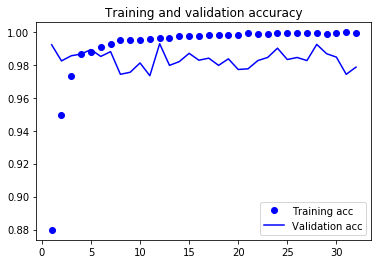

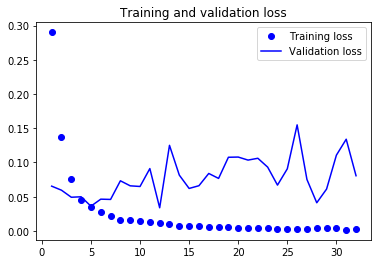

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()